In [1]:
# TODO: Import Pandas, numpy, matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# TODO: Read the csv file to dataframe
data = pd.read_csv('mtcars.csv')

In [4]:
data 

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [5]:
type (data)

pandas.core.frame.DataFrame

In [6]:
data.shape 

(32, 12)

In [7]:
data.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
data.tail(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [13]:
#data we got are in pandas dataframe format 
#we need to cast it in numpy array for calculation 
X = np.array(data.disp)
Y = np.array(data.mpg)

In [14]:
X,Y

(array([160. , 160. , 108. , 258. , 360. , 225. , 360. , 146.7, 140.8,
        167.6, 167.6, 275.8, 275.8, 275.8, 472. , 460. , 440. ,  78.7,
         75.7,  71.1, 120.1, 318. , 304. , 350. , 400. ,  79. , 120.3,
         95.1, 351. , 145. , 301. , 121. ]),
 array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
        16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
        15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4]))

In [16]:
type (X)

numpy.ndarray

In [25]:
#funtion to plot the data points 
def  plot_points (X, Y, xlabel, ylabel):
    plt.plot(X,Y,'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

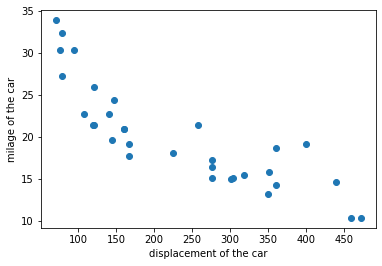

In [26]:
plot_points(X, Y, "displacement of the car", "milage of the car")

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(data.disp,data.mpg,test_size = 0.2)

In [29]:
regr = LinearRegression ()

In [31]:
regr.fit(np.array(X_train).reshape(-1,1), Y_train)

LinearRegression()

In [38]:
preds = regr.predict(np.array(X_test).reshape(-1,1))

In [39]:
Y_test.head()

23    13.3
17    32.4
3     21.4
14    10.4
22    15.2
Name: mpg, dtype: float64

In [40]:
preds

array([15.4695459 , 26.05435231, 19.05893842, 10.70969931, 17.26424216,
       20.34643791, 24.43912568])

In [41]:
residuals = preds - Y_test

(array([1., 0., 0., 0., 1., 0., 0., 1., 0., 4.]),
 array([-6.34564769, -5.41717035, -4.48869301, -3.56021568, -2.63173834,
        -1.703261  , -0.77478367,  0.15369367,  1.08217101,  2.01064834,
         2.93912568]),
 <BarContainer object of 10 artists>)

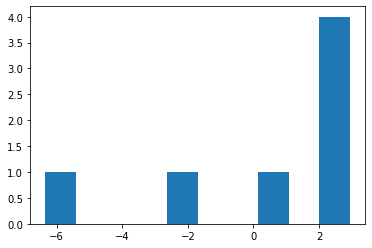

In [42]:
plt.hist(residuals)

In [44]:
mean_squared_error(Y_test, preds) **0.5

3.128137184709752